In [2]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [1]:
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [3]:
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [5]:
#load data
df=pd.DataFrame
print(df)

<class 'pandas.core.frame.DataFrame'>


In [7]:
df=pd.read_csv('/content/Salary_Data_Based_country_and_race.csv')

In [8]:
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [ ]:
df.isnull().sum()


Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [ ]:
# As the number of null values are very less , we can just remove them

df=df.dropna()

In [ ]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

Education Level
Here same level with 2 different names are present, it can cause hinderance in our analysis so converting them to same level.

Master's Degree -> Master's

Bachelor's Degree -> Bachelor's

In [ ]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [ ]:
df['Education Level']= df["Education Level"].str.replace("Master's Degree", "Master's")
df['Education Level']= df["Education Level"].str.replace("Bachelor's Degree", "Bachelor's")
df['Education Level']= df["Education Level"].str.replace("phD", "PhD")

In [ ]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

EXPLORATORY DATA ANALYSIS

In [ ]:
df['Country'].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

In [ ]:
country_wise = df['Country'].value_counts().reset_index()
country_wise.columns = ['Country', 'Number']
country_wise

,Country,Number
0,USA,1359
1,China,1343
2,Australia,1336
3,UK,1335
4,Canada,1325


In [ ]:
px.bar(country_wise,x='Country',y='Number',color='Country')

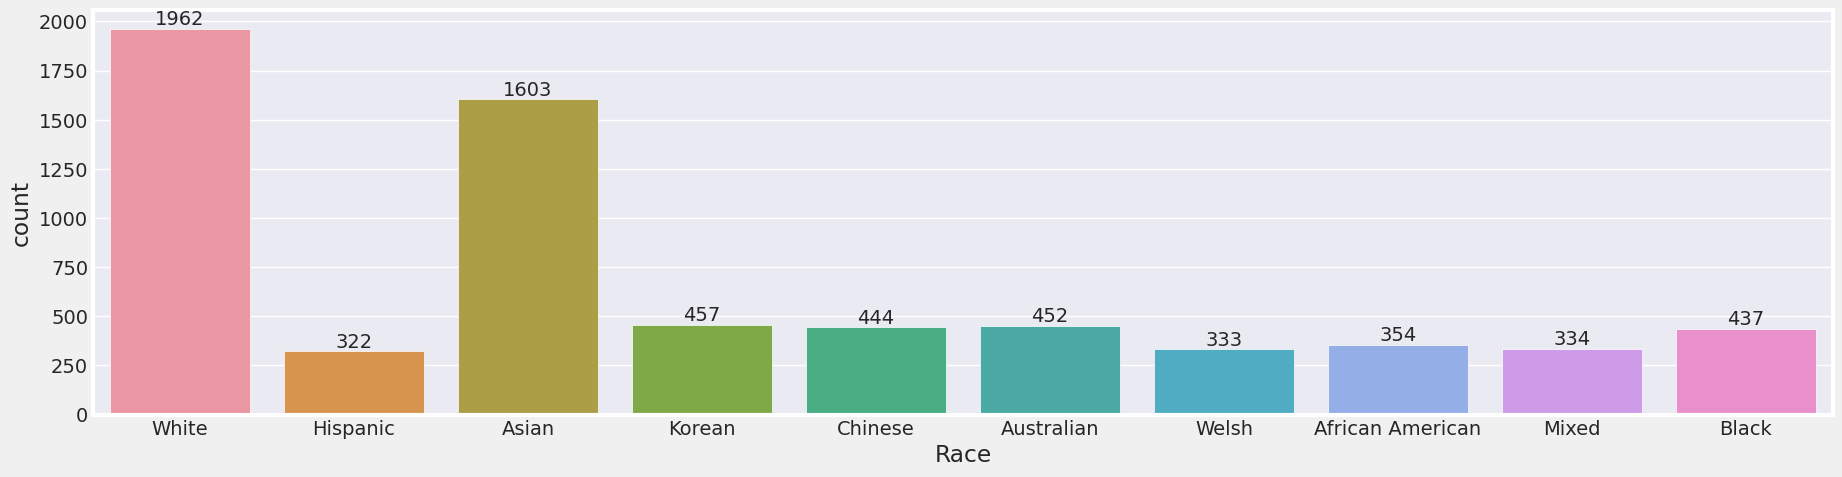

In [ ]:
#Number of People from Different Races?

plt.figure(figsize=(20, 5))
sns.set_style("darkgrid")
ax=sns.countplot(df,x='Race')

for bar in ax.containers:
  ax.bar_label(bar)

In [ ]:
px.scatter(df,x='Age',y='Salary')

In [ ]:
#Analyzing Country & Salary

px.box(df, x="Country", y="Salary", title='Country V/S Salary',color='Country',template = 'plotly_dark')

Median salary in each Country is similar

In [ ]:
salary = df.groupby('Job Title').sum()['Salary'].reset_index()
top10_jobs = salary.nlargest(10, 'Salary')
fig = px.bar(top10_jobs, x='Job Title', y='Salary', color='Job Title', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Total Salary of Top 10 Jobs', xaxis_title='Job Title', yaxis_title='Salary')
fig.show()

DATA PREPROCESSING

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['Country']= label_encoder.fit_transform(df['Country'])
df['Country'].unique()

array([3, 4, 1, 2, 0])

In [ ]:
df['Job Title']= label_encoder.fit_transform(df['Job Title'])
df['Job Title'].unique()

array([175,  18, 144, 115,  25,  93, 106, 118,  94, 165, 174,  47,  40,
       109,  14, 102,  96, 130,  19, 116,   4, 189,  53, 112,  41, 173,
       177,  66, 126, 105,   7,   1,  20,  97, 184,  46, 108,  17, 117,
       186, 101,  98,   2, 179,  11,   0,  33,  48,  13,   6,  38, 188,
        45, 187, 172,  34, 129,  56,  23,  52,  15,   5, 132, 190, 113,
       183,  12, 168,  50,  10, 182, 120,   9,  65,  39,  55, 159, 104,
       181, 148, 185, 114,  86, 110, 100, 107, 136,  90, 157,   8,  22,
        54, 145,  16, 134, 178, 180, 124,  71,  99, 103,  70, 155,  75,
       135, 119, 167,  89, 169, 161,  83,  73,  63, 156,  58, 163,  74,
        79, 123,  36,  80, 125, 153,  62, 143,  68, 152,  32,  87, 164,
        35,  61, 146, 139,  59, 122, 162,  69,  29,  72,  64, 150, 138,
       170,  78, 149, 142, 160,  37, 121,  26,  84, 140, 127,  31,  57,
        88, 147, 141, 131,  60,  85, 154,  77, 166,  81, 133, 137, 128,
        76,  30, 151,  67,  28, 176,   3, 158,  44,  43,  42,  2

In [ ]:
df['Education Level']= label_encoder.fit_transform(df['Education Level'])
df['Education Level'].unique()

array([0, 2, 3, 1])

In [ ]:
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0, 2])

In [ ]:
df['Race']= label_encoder.fit_transform(df['Race'])
df['Race'].unique()

array([9, 5, 1, 6, 4, 2, 8, 0, 7, 3])

In [ ]:
df = df.drop("Unnamed: 0", axis=1)

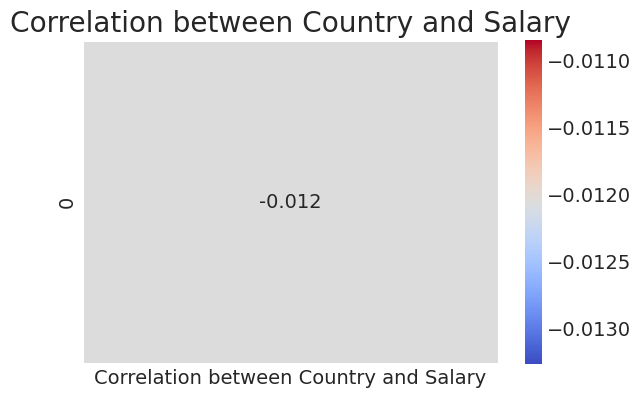

In [ ]:
# Correlation between Country and Salary
variable1 = 'Country'
variable2 = 'Salary'

# Calculate the correlation between the two variables
correlation = df[variable1].corr(df[variable2])

# Create a DataFrame with the correlation value for display purposes (optional)
correlation_df = pd.DataFrame({f'Correlation between {variable1} and {variable2}': [correlation]})

# Plot the correlation heatmap for the two variables
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.heatmap(correlation_df, annot=True, fmt=".3f", cmap='coolwarm', linewidths=1)
plt.title(f"Correlation between {variable1} and {variable2}")
plt.show()


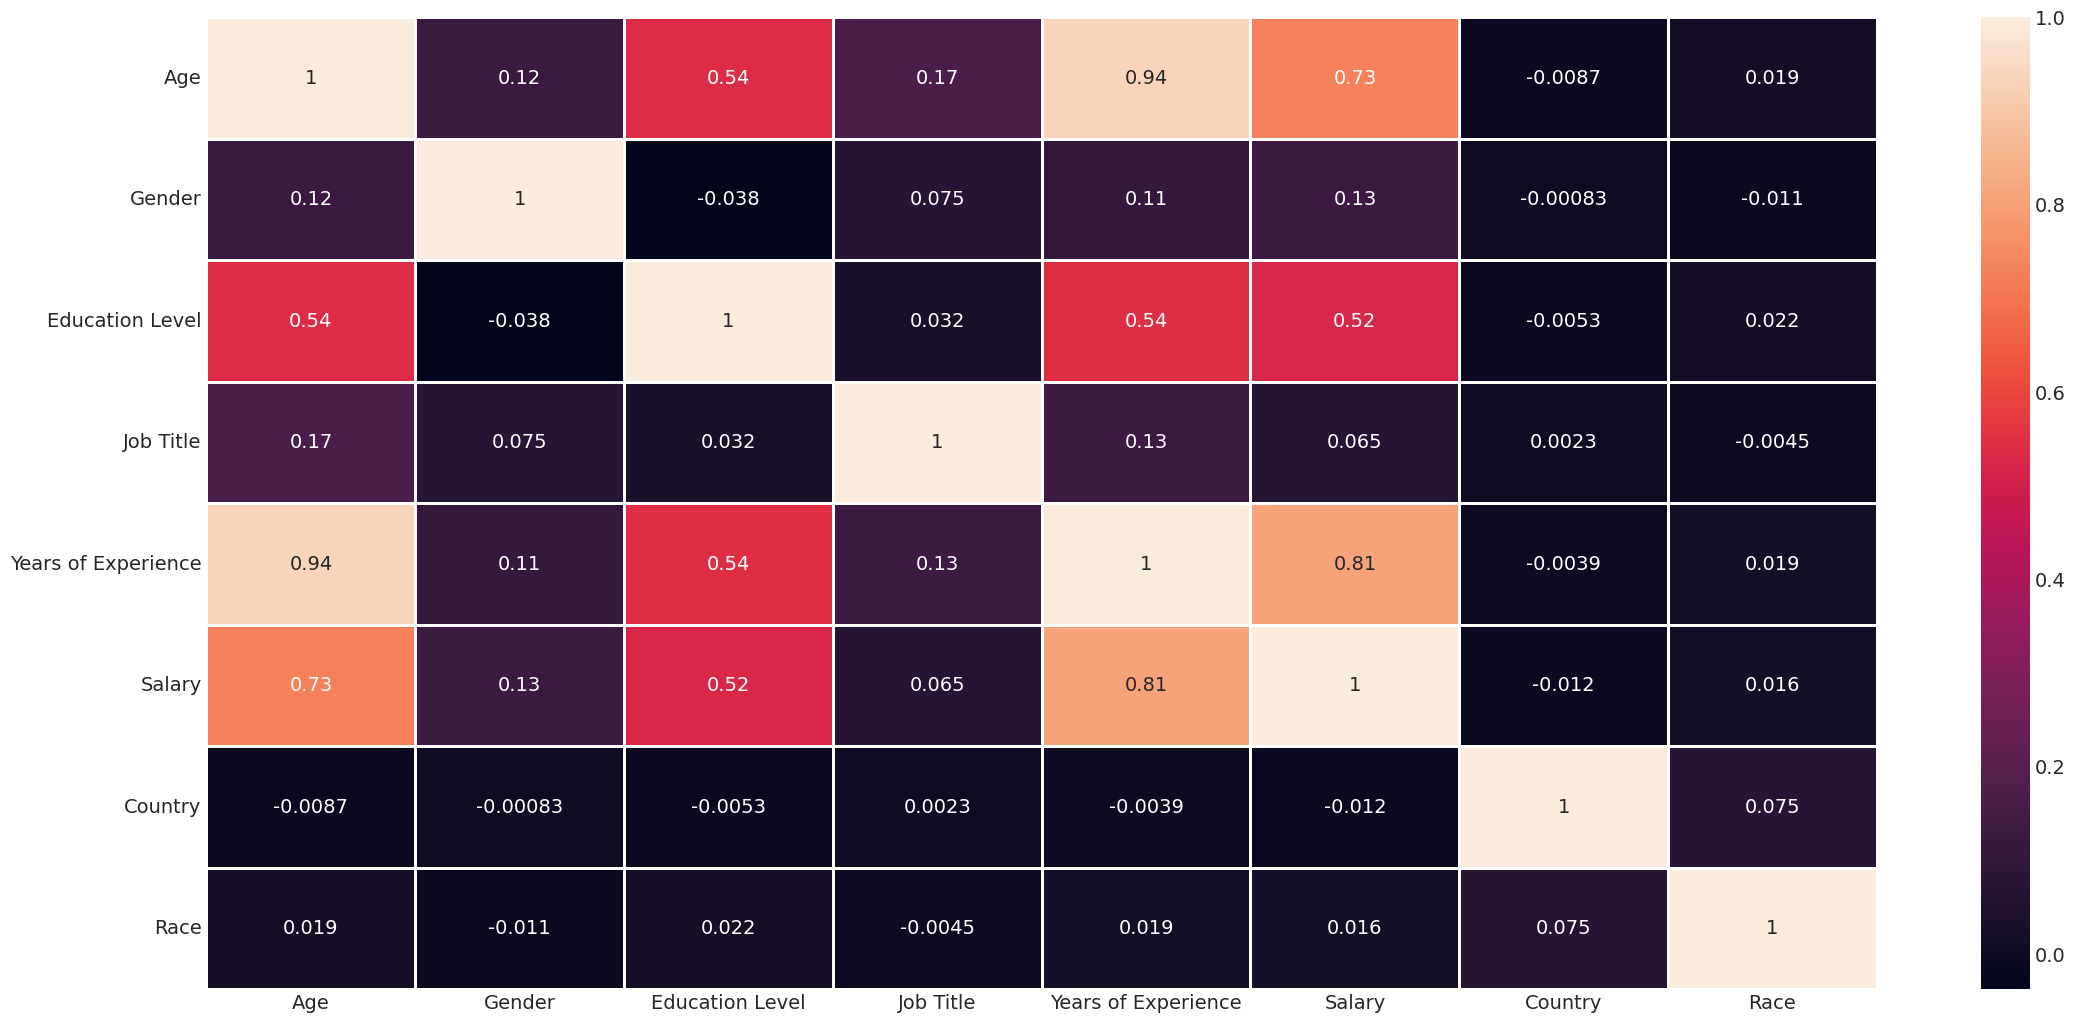

In [ ]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Salary'], axis = 1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [ ]:
X_train.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
4092,43.0,1,3,20,16.0,1,3
2180,33.0,0,0,44,6.0,0,2
5224,25.0,1,0,87,1.0,4,0
459,30.0,0,0,18,5.0,0,1
6118,40.0,0,0,41,16.0,2,9


MACHINE LEARNING MODELS

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Salary'], axis = 1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split

# Selecting the predictor variables
predictors = ['Years of Experience', 'Education Level', ]
X = df[predictors]
y = df['Salary']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [ ]:
models = [LinearRegression(), DecisionTreeRegressor()]

results = {'Model_Name': [], 'Mean_Absolute_Error_MAE': [], 'Mean_Absolute_Percentage_Error_MAPE': [],
            'Mean_Squared_Error_MSE': [], 'Root_Mean_Squared_Error_RMSE': [], 'R2_score': [], }

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)

    results['Model_Name'].append(model.__class__.__name__)
    results['Mean_Absolute_Error_MAE'].append(mae)
    results['Mean_Absolute_Percentage_Error_MAPE'].append(mape)
    results['Mean_Squared_Error_MSE'].append(mse)
    results['Root_Mean_Squared_Error_RMSE'].append(rmse)
    results['R2_score'].append(r2)
    results['adju']
Results = pd.DataFrame(results)


In [ ]:
Results.head()

,Model_Name,Mean_Absolute_Error_MAE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Error_RMSE,R2_score
0,LinearRegression,24677.971387,34.632264,9.751072e+08,31226.707197,0.656512
1,DecisionTreeRegressor,18440.110409,23.596574,6.106617e+08,24711.569992,0.784890


In [ ]:
fig = px.bar(Results, x = 'Model_Name', y = 'Mean_Absolute_Error_MAE', color = 'Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Model Name VS MAE', xaxis_title='Model_Name', yaxis_title='MAE')
fig.show()

In [ ]:
fig = px.bar(Results, x = 'Model_Name', y = 'Mean_Absolute_Percentage_Error_MAPE', color = 'Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Model VS MAE %', xaxis_title='Model_Name', yaxis_title='MAE %')
fig.show()

MODEL VS MSE

In [ ]:
fig = px.bar(Results, x = 'Model_Name', y = 'Mean_Squared_Error_MSE', color = 'Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Model Name VS MSE', xaxis_title='Model_Name', yaxis_title='MSE')
fig.show()

MODEL VS RMSE

In [ ]:
fig = px.bar(Results, x = 'Model_Name', y = 'Root_Mean_Squared_Error_RMSE', color = 'Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Model Name VS RMSE', xaxis_title='Model_Name', yaxis_title='RMSE')
fig.show()

MODEL VS R2 SCORE

In [ ]:
fig = px.bar(Results, x = 'Model_Name', y = 'R2_score', color = 'Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Model Name VS R2_score', xaxis_title='Model_Name', yaxis_title='R Squared')
fig.show()